In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
caracteristicas = pd.read_csv('./base-de-dados/EMG.csv', header=None, names=['sensor 1','sensor 2'])
labels = pd.read_csv('./base-de-dados/labels.csv', header=None, names=['neutro','sorrindo','aberto','surpreso', 'rabugento'])

dados = pd.concat([caracteristicas, labels], axis=1)

dados['label'] = dados.loc[:,['neutro','sorrindo','aberto','surpreso', 'rabugento']].idxmax(axis=1)

In [3]:
dados.shape

(50000, 8)

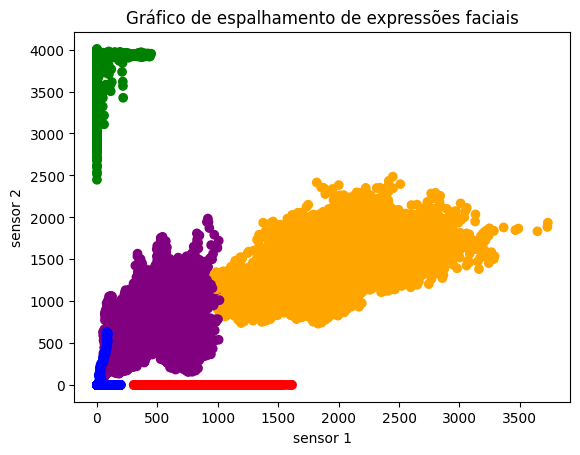

In [4]:
cores = {'neutro': 'blue', 'sorrindo': 'green', 'aberto': 'red', 'surpreso': 'purple', 'rabugento': 'orange'}

plt.scatter(dados['sensor 1'], dados['sensor 2'], c=dados['label'].apply(lambda x: cores[x]), label=dados['label'])
plt.xlabel('sensor 1')
plt.ylabel('sensor 2')
plt.title('Gráfico de espalhamento de expressões faciais')
plt.show()

In [14]:
class MQO:
    def __init__(self, inputs, outputs, lambda_):
        self.inputs = inputs
        self.outputs = outputs
        self.lambda_ = lambda_
    
    def treinar(self):
        inputs = self.inputs
        outputs = self.outputs
        lambda_ = self.lambda_

        X = np.c_[np.ones((inputs.shape[0], 1)), inputs]

        termo_de_regularizacao = np.eye(X.shape[1]) * lambda_

        treino = np.linalg.inv(X.T @ X + termo_de_regularizacao) @ X.T @ outputs

        intercepto = treino[0]
        coef = treino[1:]

        return coef, intercepto

    def previsao(self, inputs, coef, intercepto):
        previsoes = inputs @ coef + intercepto
        previsoes_binarias = np.where(previsoes == np.max(previsoes, axis=1, keepdims=True), 1, -1)

        return previsoes_binarias

    def acuracia(self, previsoes, outputs):
        acertos = np.sum(np.all(previsoes == outputs, axis=1))
        acc = acertos/outputs.shape[0]

        return acc * 100



In [33]:
coef_bruno

array([[-5.31115259e-04, -3.42613345e-04,  7.24496761e-05,
        -1.39476700e-04,  9.40755629e-04],
       [-2.64621740e-04,  4.81108958e-04, -2.23987894e-04,
        -1.01304293e-04,  1.08804969e-04]])

In [15]:
inputs = dados.loc[:,['sensor 1', 'sensor 2']].values
outputs = dados.loc[:,['neutro','sorrindo','aberto','surpreso', 'rabugento']].values

In [19]:
from sklearn.model_selection import train_test_split

resultados = pd.DataFrame(columns=['acc treino', 'acc teste'])
lambdas=[0]

for i in range(100):

    inputs_treino, inputs_teste, outputs_treino, outputs_teste = train_test_split(inputs, outputs, test_size=0.2)
        
    modelo_bruno = MQO(inputs_treino, outputs_treino, lambdas[0])

    coef_bruno, intercepto_bruno = modelo_bruno.treinar()

    previsao_treino = modelo_bruno.previsao(inputs_treino, coef_bruno, intercepto_bruno)
    acuracia_treino = modelo_bruno.acuracia(previsao_treino,outputs_treino)

    previsao_teste = modelo_bruno.previsao(inputs_teste, coef_bruno, intercepto_bruno)
    acuracia_teste = modelo_bruno.acuracia(previsao_teste,outputs_teste)

    resultados= pd.concat([resultados, pd.DataFrame({'acc treino': [acuracia_treino], 'acc teste':[acuracia_teste]})], ignore_index=True)



In [37]:
from sklearn.model_selection import train_test_split

resultados_regul = pd.DataFrame(columns=['acc treino', 'acc teste', 'lambda'])
lambdas=[0.3, 0.5, ]
for lambda_ in lambdas:
    for i in range(100):

        inputs_treino, inputs_teste, outputs_treino, outputs_teste = train_test_split(inputs, outputs, test_size=0.2)
            
        modelo_bruno = MQO(inputs_treino, outputs_treino, lambdas[0])

        coef_bruno, intercepto_bruno = modelo_bruno.treinar()

        previsao_treino = modelo_bruno.previsao(inputs_treino, coef_bruno, intercepto_bruno)
        acuracia_treino = modelo_bruno.acuracia(previsao_treino,outputs_treino)

        previsao_teste = modelo_bruno.previsao(inputs_teste, coef_bruno, intercepto_bruno)
        acuracia_teste = modelo_bruno.acuracia(previsao_teste,outputs_teste)

        resultados_regul= pd.concat([resultados_regul, pd.DataFrame({'acc treino': [acuracia_treino], 'acc teste':[acuracia_teste], 'lambda':[lambda_]})], ignore_index=True)
    

In [39]:
resultados_regul.style.highlight_max(subset=['acc teste'], axis=0)

,acc treino,acc teste,lambda
0,72.630000,73.220000,0.300000
1,71.877500,71.480000,0.300000
2,72.585000,71.940000,0.300000
3,72.462500,72.910000,0.300000
4,72.270000,71.550000,0.300000
5,72.702500,72.810000,0.300000
6,72.565000,73.760000,0.300000
7,72.002500,71.680000,0.300000
8,72.605000,72.800000,0.300000
9,72.237500,71.240000,0.300000


In [32]:
resultados['acc treino'].std()

0.32887497528496523

In [34]:
dados

,sensor 1,sensor 2,neutro,sorrindo,aberto,surpreso,rabugento,label
0,0.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,neutro
1,0.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,neutro
2,0.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,neutro
3,0.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,neutro
4,0.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,neutro
...,...,...,...,...,...,...,...,...
49995,2346.0,1932.0,-1.0,-1.0,-1.0,-1.0,1.0,rabugento
49996,2311.0,1888.0,-1.0,-1.0,-1.0,-1.0,1.0,rabugento
49997,2234.0,1904.0,-1.0,-1.0,-1.0,-1.0,1.0,rabugento
49998,2167.0,1920.0,-1.0,-1.0,-1.0,-1.0,1.0,rabugento
